# Demo TECxTMS_2F (total electron content)

> Authors: Ashley Smith
>
> Abstract: Access to the total electric contents (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2021-01-24T15:45:59+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.7.1
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

request = SwarmRequest()

## TECxTMS_2F product information

Derived total electron content (TEC) 

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#TECxTMS_2F

### Check what "TEC" data variables are available

In [3]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [4]:
request.available_measurements("TEC")

['GPS_Position',
 'LEO_Position',
 'PRN',
 'L1',
 'L2',
 'P1',
 'P2',
 'S1',
 'S2',
 'Elevation_Angle',
 'Absolute_VTEC',
 'Absolute_STEC',
 'Relative_STEC',
 'Relative_STEC_RMS',
 'DCB',
 'DCB_Error']

## Fetch one day of TEC data

In [5]:
request.set_collection("SW_OPER_TECATMS_2F")
request.set_products(measurements=request.available_measurements("TEC"))
data = request.get_between(dt.datetime(2014,1,1),
                           dt.datetime(2014,1,2))

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (9.311MB)


### Loading as pandas

In [6]:
df = data.as_dataframe()
df.head()

DCB_Error  Elevation_Angle     S2        DCB  \
Timestamp                                                           
2014-01-01 00:00:04   0.832346        39.683333  36.83 -11.446853   
2014-01-01 00:00:04   0.832346        37.478137  34.75 -11.446853   
2014-01-01 00:00:04   0.832346        24.681787  30.90 -11.446853   
2014-01-01 00:00:04   0.832346        24.647445  29.87 -11.446853   
2014-01-01 00:00:04   0.832346        30.753636  30.88 -11.446853   

                     Relative_STEC_RMS Spacecraft  Latitude            L1  \
Timestamp                                                                   
2014-01-01 00:00:04           0.555675          A -1.482419 -6.261986e+06   
2014-01-01 00:00:04           0.488000          A -1.482419 -1.466568e+07   
2014-01-01 00:00:04           1.313984          A -1.482419 -5.455452e+06   
2014-01-01 00:00:04           0.899036          A -1.482419 -3.402816e+06   
2014-01-01 00:00:04           0.546729          A -1.482419 -2.285981e+06   

                     PRN  Absolute_VTEC            P2        Radius  \
Timestamp                                                             
2014-01-01 00:00:04   15      10.894886  2.182914e+07  6.878338e+06   
2014-01-01 00:00:04   18      10.461554  2.135749e+07  6.878338e+06   
2014-01-01 00:00:04   22       9.529846  2.277638e+07  6.878338e+06   
2014-01-01 00:00:04   24       9.357587  2.298847e+07  6.878338e+06   
2014-01-01 00:00:04   25       8.597559  2.229900e+07  6.878338e+06   

                                                          LEO_Position  \
Timestamp                                                                
2014-01-01 00:00:04  [6668214.544000001, -1677732.674, -177943.9959...   
2014-01-01 00:00:04  [6668214.544000001, -1677732.674, -177943.9959...   
2014-01-01 00:00:04  [6668214.544000001, -1677732.674, -177943.9959...   
2014-01-01 00:00:04  [6668214.544000001, -1677732.674, -177943.9959...   
2014-01-01 00:00:04  [6668214.544000001, -1677732.674, -177943.9959...   

                     Longitude  Absolute_STEC            L2            P1  \
Timestamp                                                                   
2014-01-01 00:00:04 -14.122572      16.429938 -6.261989e+06  2.182913e+07   
2014-01-01 00:00:04 -14.122572      16.456409 -1.466568e+07  2.135749e+07   
2014-01-01 00:00:04 -14.122572      20.434286 -5.455454e+06  2.277638e+07   
2014-01-01 00:00:04 -14.122572      20.085094 -3.402821e+06  2.298846e+07   
2014-01-01 00:00:04 -14.122572      15.676947 -2.285986e+06  2.229899e+07   

                                                          GPS_Position     S1  \
Timestamp                                                                       
2014-01-01 00:00:04  [22448765.690377887, 5421379.431197803, -13409...  36.83   
2014-01-01 00:00:04  [16113499.491062254, -16306172.004347403, -126...  34.75   
2014-01-01 00:00:04  [10823457.339250825, -24014739.352816023, -248...  30.90   
2014-01-01 00:00:04  [20631539.59055339, 13441368.439225309, 100505...  29.87   
2014-01-01 00:00:04  [16637723.905075422, -10692759.977004562, 1761...  30.88   

                     Relative_STEC  
Timestamp                           
2014-01-01 00:00:04      24.041127  
2014-01-01 00:00:04      22.754795  
2014-01-01 00:00:04      15.585271  
2014-01-01 00:00:04      52.291341  
2014-01-01 00:00:04      52.672067

NB: The time interval is not always the same:

In [7]:
times = df.index
np.unique(np.sort(np.diff(times.to_pydatetime())))

array([datetime.timedelta(0), datetime.timedelta(seconds=10)],
      dtype=object)

In [8]:
len(df), 60*60*24

(49738, 86400)

## Loading and plotting as xarray

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:            (Timestamp: 49738, WGS84: 3)
Coordinates:
  * Timestamp          (Timestamp) datetime64[ns] 2014-01-01T00:00:04 ... 2014-01-01T23:59:54
  * WGS84              (WGS84) <U1 'X' 'Y' 'Z'
Data variables:
    Spacecraft         (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Elevation_Angle    (Timestamp) float64 39.68 37.48 24.68 ... 49.64 45.71
    S2                 (Timestamp) float64 36.83 34.75 30.9 ... 23.03 37.73 37.5
    Relative_STEC_RMS  (Timestamp) float64 0.5557 0.488 1.314 ... 0.6458 3.041
    Latitude           (Timestamp) float64 -1.482 -1.482 -1.482 ... -81.7 -81.7
    Absolute_VTEC      (Timestamp) float64 10.89 10.46 9.53 ... 8.365 7.912
    P2                 (Timestamp) float64 2.183e+07 2.136e+07 ... 2.171e+07
    S1                 (Timestamp) float64 36.83 34.75 30.9 ... 23.03 37.73 37.5
    Relative_STEC      (Timestamp) float64 24.04 22.75 15.59 ... 16.92 26.51
    DCB_Error          (Timestamp) float64 0.8323 0.8323 ... 0.8323 0.8323
    DCB                (Timestamp) float64 -11.45 -11.45 ... -11.45 -11.45
    L1                 (Timestamp) float64 -6.262e+06 -1.467e+07 ... -3.41e+06
    PRN                (Timestamp) uint16 15 18 22 24 25 29 ... 7 15 16 18 21 26
    Radius             (Timestamp) float64 6.878e+06 6.878e+06 ... 6.88e+06
    LEO_Position       (Timestamp, WGS84) float64 6.668e+06 ... -6.808e+06
    Longitude          (Timestamp) float64 -14.12 -14.12 -14.12 ... 1.559 1.559
    Absolute_STEC      (Timestamp) float64 16.43 16.46 20.43 ... 10.77 10.78
    L2                 (Timestamp) float64 -6.262e+06 -1.467e+07 ... -3.41e+06
    P1                 (Timestamp) float64 2.183e+07 2.136e+07 ... 2.171e+07
    GPS_Position       (Timestamp, WGS84) float64 2.245e+07 ... -2.111e+07
Attributes:
    Sources:         ['SW_OPER_TECATMS_2F_20140101T000000_20140101T235959_0301']
    MagneticModels:  []
    RangeFilters:    []

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


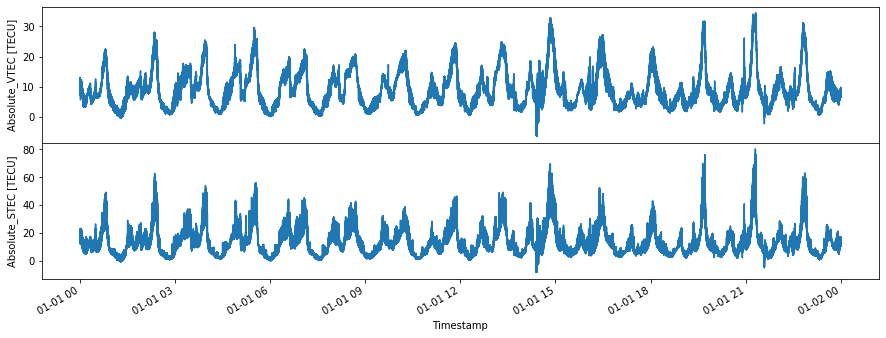

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,5), sharex=True)
ds["Absolute_VTEC"].plot.line(x="Timestamp", ax=axes[0])
ds["Absolute_STEC"].plot.line(x="Timestamp", ax=axes[1]);
fig.subplots_adjust(hspace=0)